# TASK - 1

## Project - House Price Prediction

#### Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.


## 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error , r2_score


## 2. Explore the Data

In [2]:
os.chdir("C:\\Users\\tanis\\Downloads\\PRODIGY_ML_01")

In [3]:
data = pd.read_csv("train.csv")
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
data.shape

(1460, 81)

In [32]:
data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1444,1445,20,RL,63.0,8500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,179600
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
244,245,60,RL,NaN,8880,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,205000
1336,1337,90,RL,87.0,9246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,135000
13,14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,New,Partial,279500


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [34]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [35]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [36]:
data.duplicated().sum()

0

In [37]:
data.isnull().sum().sum()

7829

In [38]:
data.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


## 4. EDA(Exploratory data analysis)¶

### 1. Analyzing the Relationship between Lot Size and Sale Price

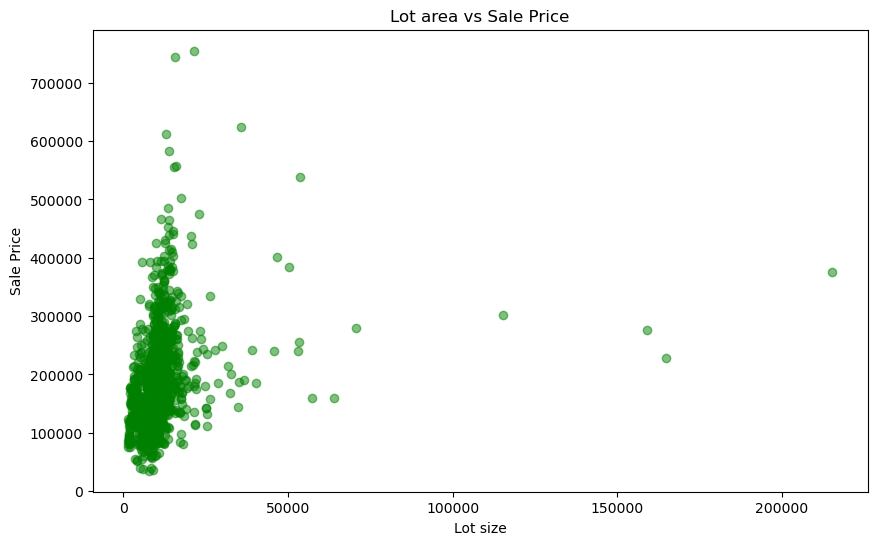

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(data['LotArea'], data['SalePrice'], color='green', alpha=0.5)
plt.xlabel('Lot size')
plt.ylabel('Sale Price')
plt.title('Lot area vs Sale Price')
plt.show()

#### Conclusion :
The scatter plot indicates a general trend that larger lot sizes tend to be associated with higher sale prices.


### 2. Analyzing Average Sale Price by Street Category

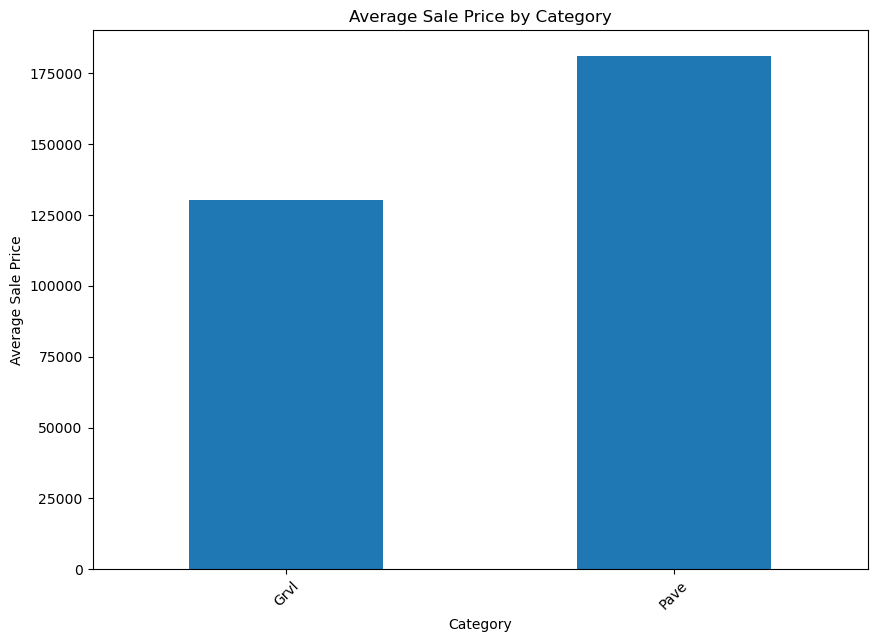

In [6]:
group_street = data.groupby('Street')
avg_sale_price = group_street['SalePrice'].mean()

plt.figure(figsize = (10,7))
avg_sale_price.plot(kind = 'bar')
plt.title('Average Sale Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Sale Price')
plt.xticks(rotation = 45)
plt.show()

#### Conclusion : 
The bar chart highlights the variation in average sale prices across different street categories. This indicates that the street category can influence house prices, with certain categories showing higher average sale prices than others.


### 3. Analyzing Average Sale Price by Alley Category¶


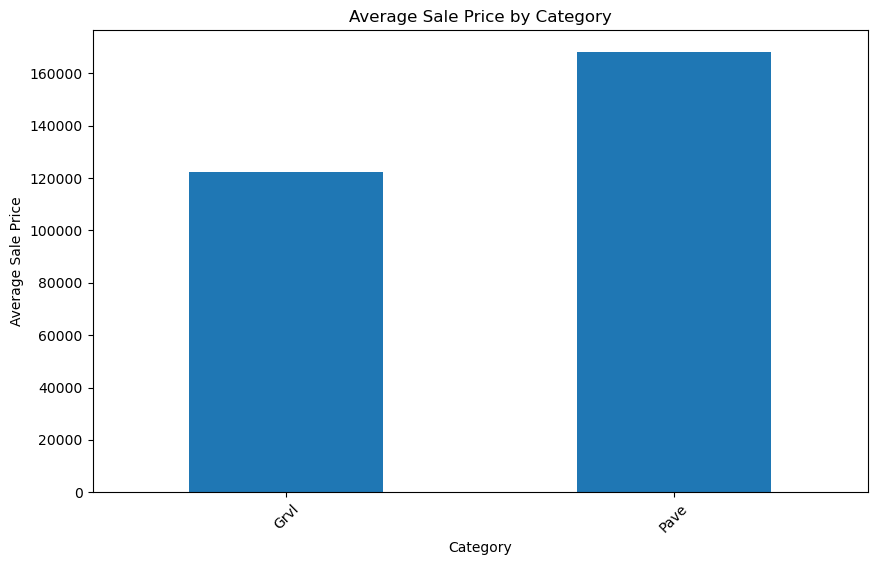

In [7]:
group_Alley = data.groupby('Alley')
avg_sale_price_Alley = group_Alley['SalePrice'].mean()

plt.figure(figsize=(10, 6))
avg_sale_price_Alley.plot(kind='bar')
plt.title('Average Sale Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)
plt.show()

#### Conclusion :
The bar chart illustrates how average sale prices vary across different alley categories. It indicates that the type of alley can influence house prices, with certain categories showing higher average sale prices than others.

### 4. Analyzing Lot Area by Sale 

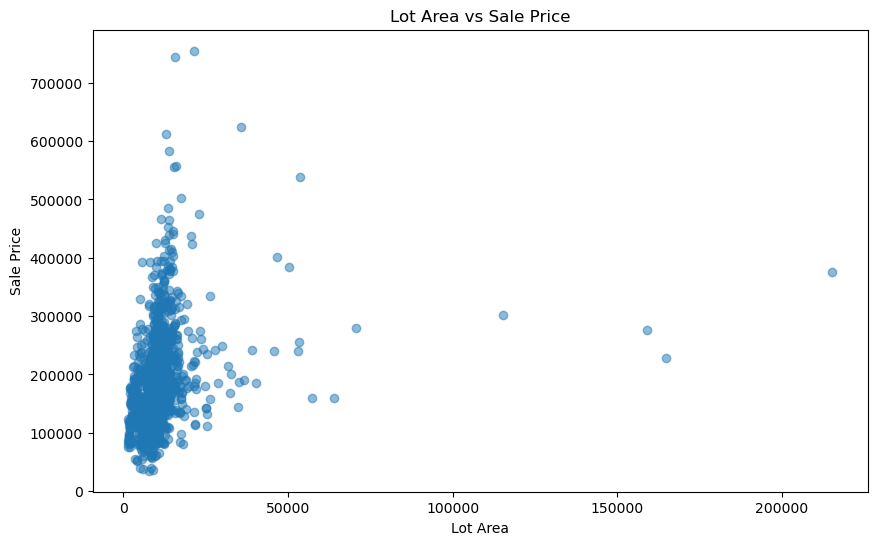

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(data['LotArea'], data['SalePrice'], alpha=0.5)
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('Lot Area vs Sale Price')
plt.show()

#### Conclusion :
There is a general trend showing that larger lot areas tend to correlate with higher sale prices, though there is significant variability.


### 5. Distribution of Sale Prices

C:\Users\tanis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


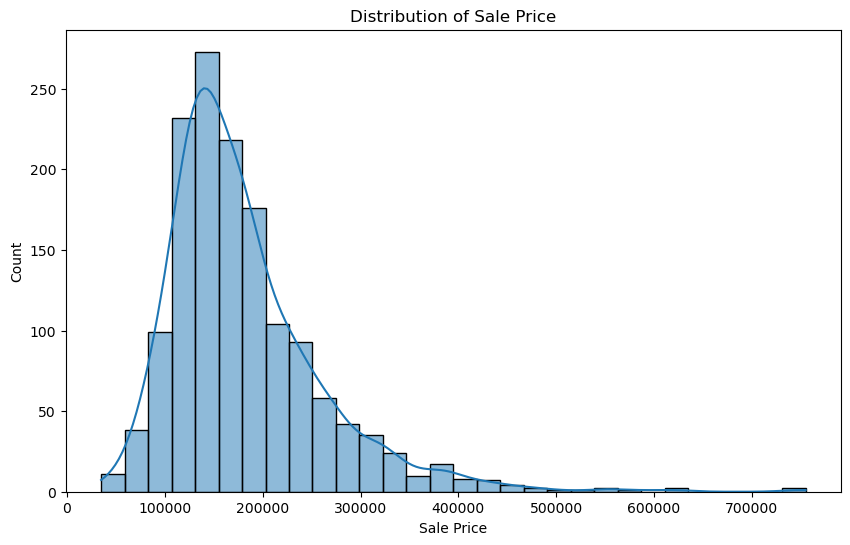

In [10]:
# 2. Histogram: Distribution of Sale Price
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], bins=30, kde=True)
plt.xlabel('Sale Price')
plt.title('Distribution of Sale Price')
plt.show()

#### Conclusion :
Sale prices are right-skewed, with most houses clustered at lower prices and a few high-value outliers.


### 6. Sale Price Distribution by Overall Quality

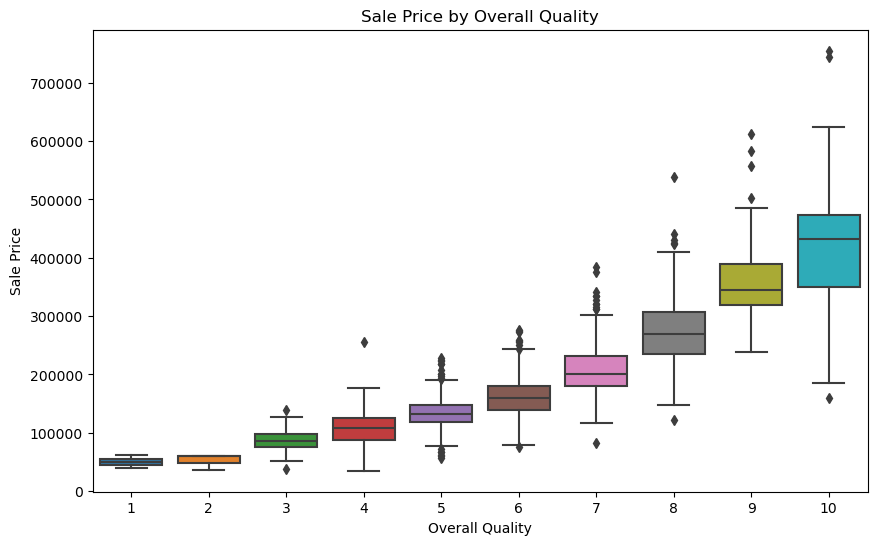

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=data)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Sale Price by Overall Quality')
plt.show()

#### Conclusion : 
Houses with higher overall quality ratings generally have higher sale prices, indicating a positive correlation between quality and price.

### 7. Sale Price Distribution by Year Built

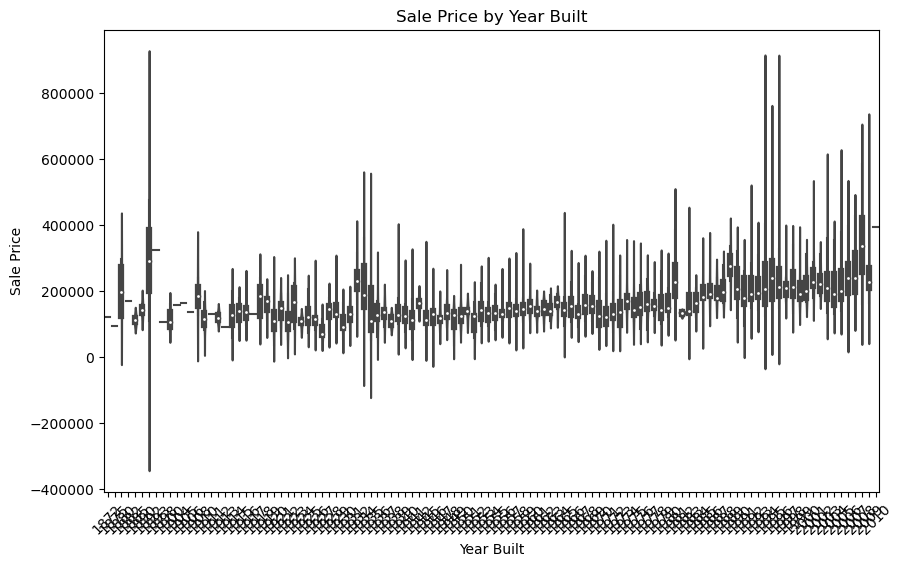

In [12]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='YearBuilt', y='SalePrice', data=data)
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.title('Sale Price by Year Built')
plt.xticks(rotation=45)
plt.show()


#### Conclusion :
Newer houses tend to have higher sale prices, with noticeable variations in price distribution for each construction year.

### 8. Pairwise Relationships Among Selected Features

C:\Users\tanis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tanis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tanis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tanis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

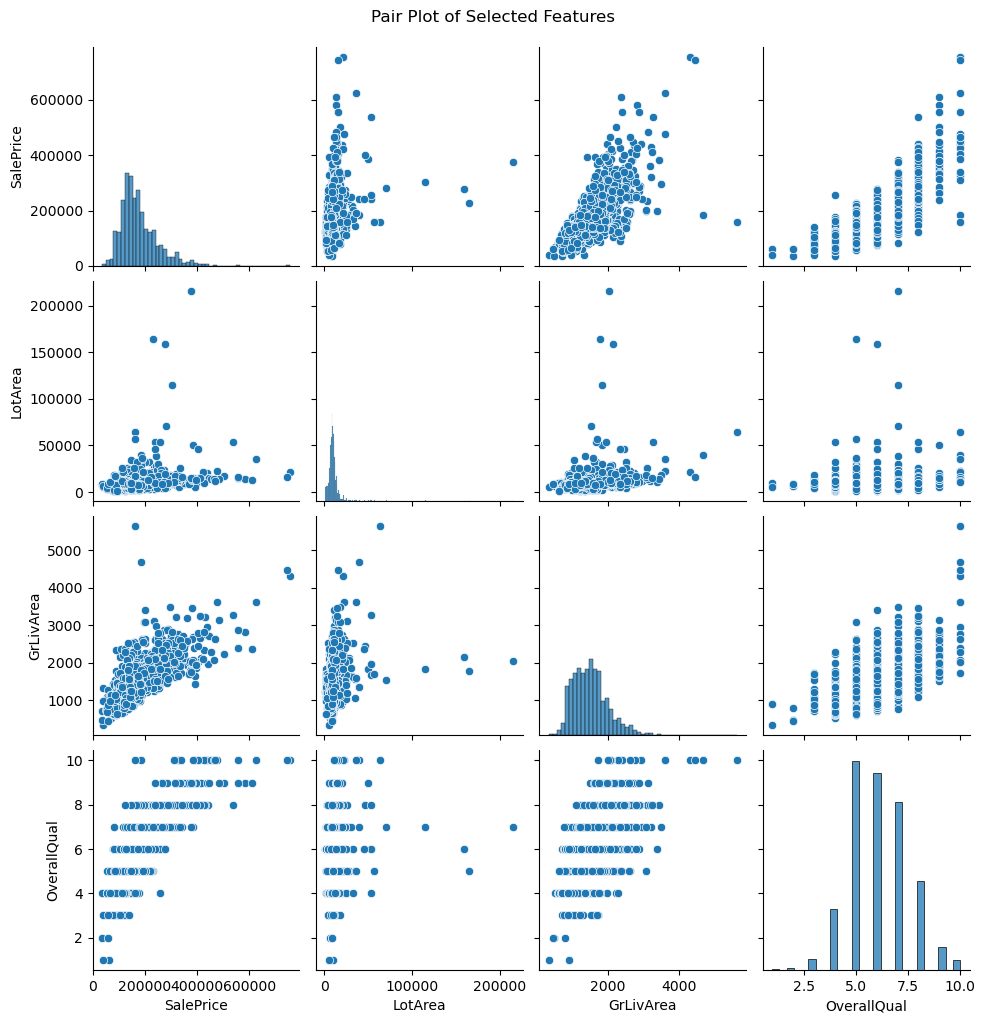

In [14]:
selected_features = ['SalePrice', 'LotArea', 'GrLivArea', 'OverallQual']
sns.pairplot(data[selected_features])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

#### Conclusion :
There are visible positive correlations between sale price, lot area, ground living area, and overall quality, indicating these features are important predictors.

### 9. Average Sale Price by Neighborhood

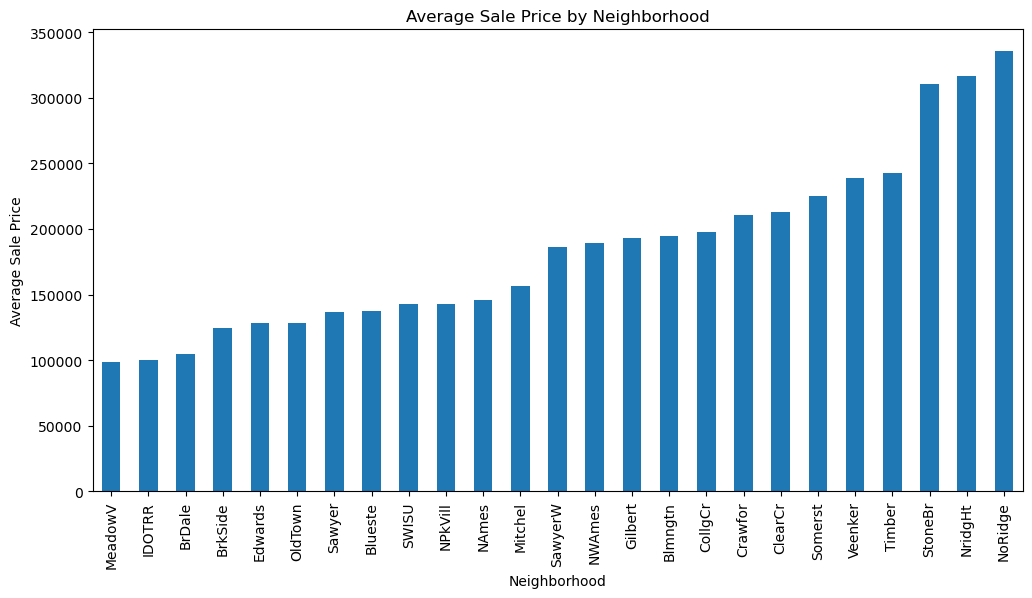

In [15]:
plt.figure(figsize=(12, 6))
avg_sale_price_neighborhood = data.groupby('Neighborhood')['SalePrice'].mean().sort_values()
avg_sale_price_neighborhood.plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Neighborhood')
plt.xticks(rotation=90)
plt.show()

#### Conclusion :
Certain neighborhoods command significantly higher average sale prices, highlighting the impact of location on property value.

### 10. Average Sale Price Trend Over Years

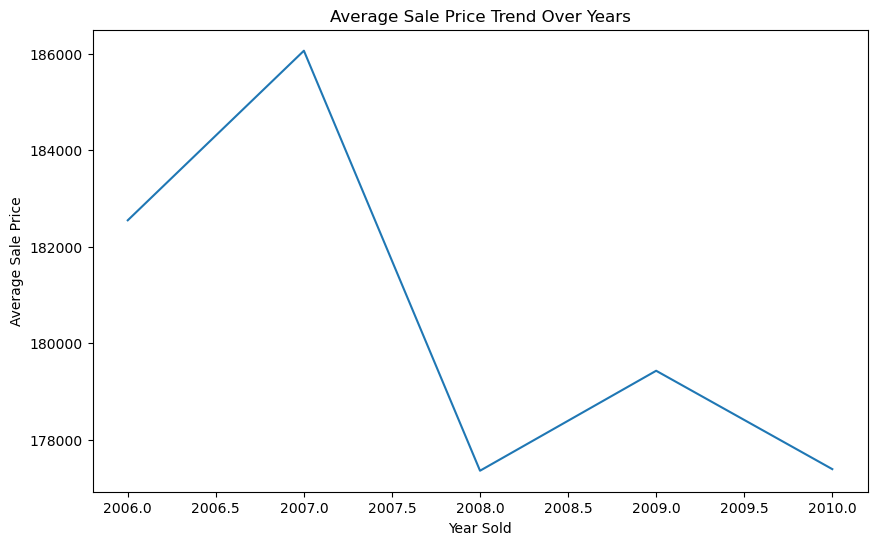

In [16]:
plt.figure(figsize=(10, 6))
avg_sale_price_year = data.groupby('YrSold')['SalePrice'].mean()
avg_sale_price_year.plot(kind='line')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price Trend Over Years')
plt.show()

#### Conclusion :
There is an overall increasing trend in average sale prices over the years, reflecting market appreciation over time.


### 11. Sale Price Distribution by House Style

C:\Users\tanis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tanis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tanis\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 37.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tanis\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 57.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tanis\anaco

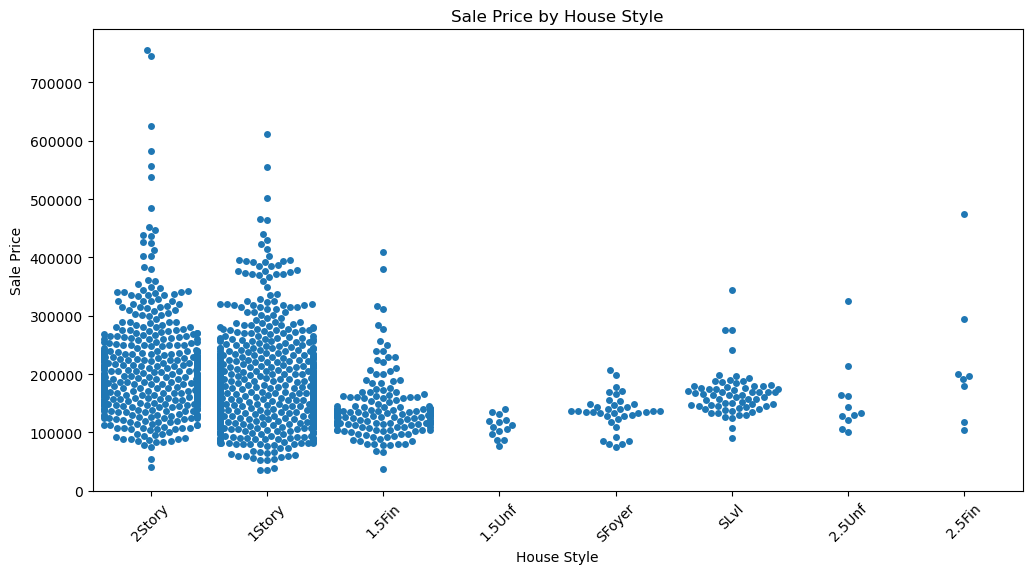

In [17]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='HouseStyle', y='SalePrice', data=data)
plt.xlabel('House Style')
plt.ylabel('Sale Price')
plt.title('Sale Price by House Style')
plt.xticks(rotation=45)
plt.show()


#### Conclusion : 
Different house styles exhibit varied price distributions, with some styles like "2Story" tending to have higher sale prices.

### 12. Sale Price Distribution Based on Central Air Conditioning

C:\Users\tanis\AppData\Local\Temp\ipykernel_2800\3313611605.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['CentralAir'] == 'Y']['SalePrice'], label='Central Air: Yes', shade=True)
C:\Users\tanis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tanis\AppData\Local\Temp\ipykernel_2800\3313611605.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['CentralAir'] == 'N']['SalePrice'], label='Central Air: No', shade=True)
C:\Users\tanis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: u

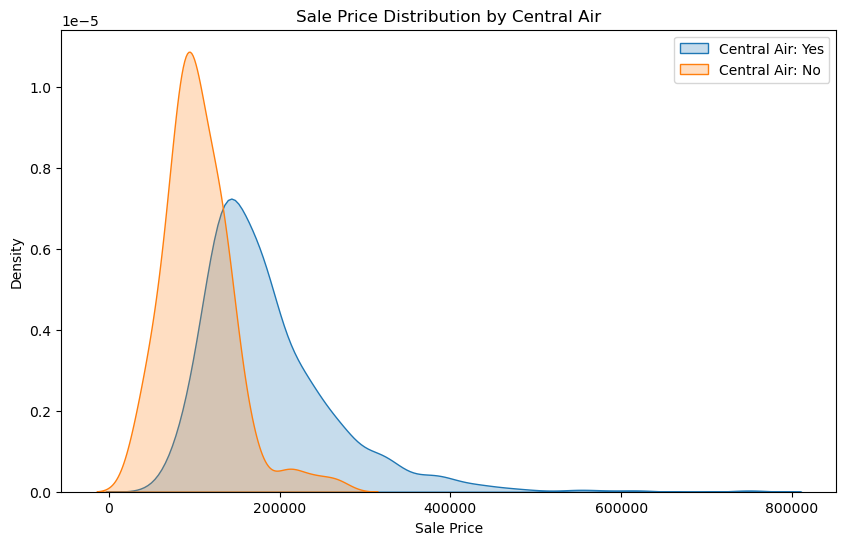

In [18]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data[data['CentralAir'] == 'Y']['SalePrice'], label='Central Air: Yes', shade=True)
sns.kdeplot(data=data[data['CentralAir'] == 'N']['SalePrice'], label='Central Air: No', shade=True)
plt.xlabel('Sale Price')
plt.title('Sale Price Distribution by Central Air')
plt.legend()
plt.show()


#### Conclusion : 
Houses with central air conditioning generally have higher sale prices compared to those without it.


### 13. Count of Houses by Overall Quality

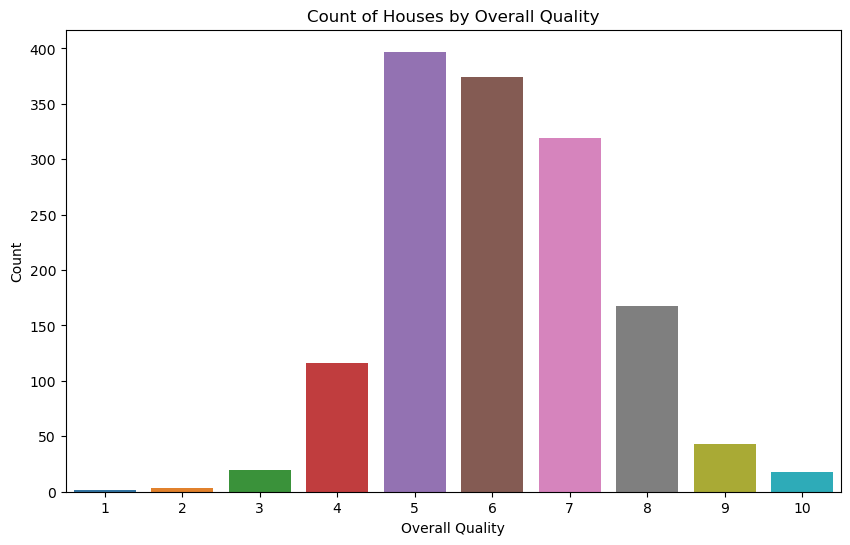

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='OverallQual', data=data)
plt.xlabel('Overall Quality')
plt.ylabel('Count')
plt.title('Count of Houses by Overall Quality')
plt.show()

#### Conclusion :
Most houses fall within the mid-range quality ratings, with fewer houses rated as very low or very high quality.

### 14. Relationship between Sale Price and Ground Living Area

C:\Users\tanis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tanis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


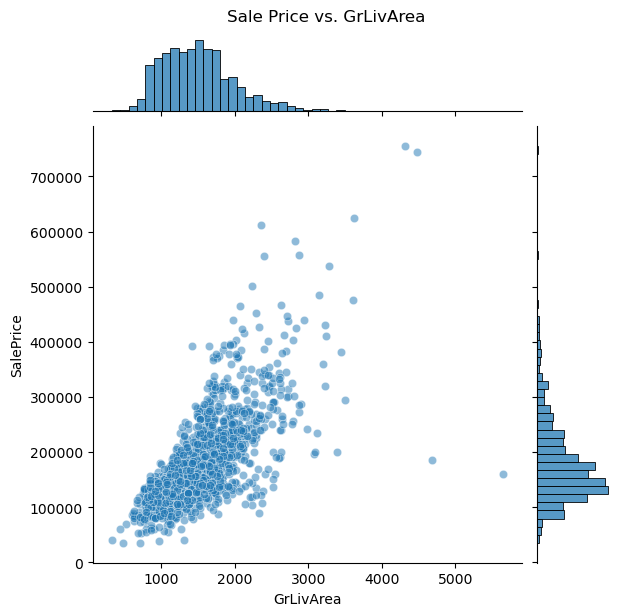

In [20]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=data, kind='scatter', alpha=0.5)
plt.suptitle('Sale Price vs. GrLivArea', y=1.02)
plt.show()

#### Conclusion :
There is a clear positive correlation between ground living area and sale price, indicating that larger homes tend to sell for more.

# 5. Linear Regression

In [21]:
features = ["BedroomAbvGr" , "FullBath","GrLivArea"]

In [22]:
X = data[features]
y = data['SalePrice']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
msc = mean_squared_error(y_test,y_pred)

In [27]:
r2 = r2_score(y_test,y_pred)

In [28]:
print("Mean squared error :",msc)
print("R2 score :" , r2)

Mean squared error : 2806426667.244815
R2 score : 0.6341189942332333


#### Actual Prices vs Predicted Prices

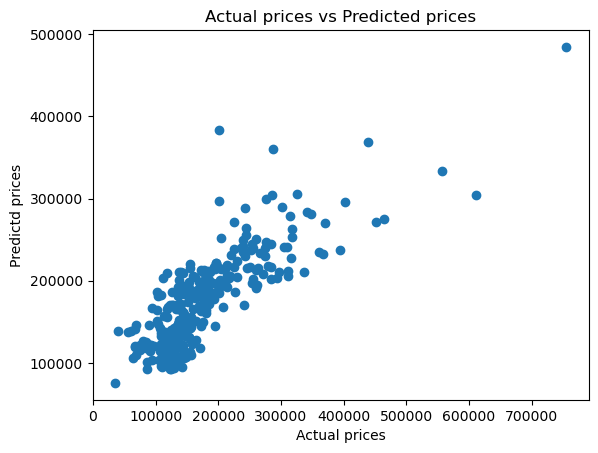

In [29]:
plt.scatter(y_test , y_pred)
plt.xlabel("Actual prices")
plt.ylabel("Predictd prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

#### Conclusion :
The scatter plot shows that if the model is performing well, the points should lie close to the diagonal line where the actual prices equal the predicted prices.

In [30]:
new_data = pd.DataFrame({"BedroomAbvGr":[3],"FullBath" :[2],"GrLivArea" : [3000]})

In [31]:
print("predicted price :",model.predict(new_data))

predicted price : [344403.82180996]


##### The scatter plot of actual prices versus predicted prices indicates that the linear regression model predicts house prices with a reasonable level of accuracy, as many points lie close to the diagonal line. However, there are some deviations, suggesting that while the model captures general trends, there are discrepancies that may need further refinement or consideration of additional features.






 